In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = './data'

student_log_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('student_log')]
training_label_path = os.path.join(data_dir, 'training_label.csv')
validation_test_label = os.path.join(data_dir, 'validation_test_label.csv')

dfs = []
for path in student_log_paths:
    temp = pd.read_csv(path)
    dfs.append(temp)
student_df = pd.concat(dfs)

training_label_df = pd.read_csv(training_label_path)
validation_test_label_df = pd.read_csv(validation_test_label)

/Users/chunkit/anaconda3/envs/dlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("student_df.shape:", student_df.shape) 
print("training_label_df.shape:", training_label_df.shape)
print("validation_test_label_df.shape:", validation_test_label_df.shape)

student_df.shape: (942816, 77)
training_label_df.shape: (514, 5)
validation_test_label_df.shape: (172, 4)


In [4]:
len(set(training_label_df.ITEST_id).intersection(set(validation_test_label_df.ITEST_id)))

48

In [5]:
student_df.head()

,AveCarelessness,AveCorrect,AveKnow,AveResBored,AveResConf,AveResEngcon,AveResFrust,AveResGaming,AveResOfftask,ITEST_id,...,timeOver80,timeSinceSkill,timeTaken,totalFrAttempted,totalFrPastWrongCount,totalFrPercentPastWrong,totalFrSkillOpportunities,totalFrSkillOpportunitiesByScaffolding,totalFrTimeOnSkill,totalTimeByPercentCorrectForskill
0,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,143.0,0,0,0.0,0,0.0,0.0,143.0
1,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,82.0,1,0,0.0,0,0.0,0.0,82.0
2,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,104.0,2,0,0.0,0,0.0,0.0,104.0
3,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,1,0.0,106.0,3,0,0.0,0,0.0,0.0,106.0
4,0.327994,0.613402,0.592481,0.269116,0.115623,0.644795,0.077154,0.003914,0.269938,6173,...,0,0.0,39.0,4,0,0.0,0,0.0,0.0,0.0


In [6]:
student_df.columns

Index(['AveCarelessness', 'AveCorrect', 'AveKnow', 'AveResBored', 'AveResConf',
       'AveResEngcon', 'AveResFrust', 'AveResGaming', 'AveResOfftask',
       'ITEST_id', 'Ln', 'Ln-1', 'NumActions', 'Prev5count', 'RES_BORED',
       'RES_CONCENTRATING', 'RES_CONFUSED', 'RES_FRUSTRATED', 'RES_GAMING',
       'RES_OFFTASK', 'SY ASSISTments Usage', 'actionId', 'assignmentId',
       'assistmentId', 'attemptCount', 'bottomHint', 'confidence(BORED)',
       'confidence(CONCENTRATING)', 'confidence(CONFUSED)',
       'confidence(FRUSTRATED)', 'confidence(GAMING)', 'confidence(OFF TASK)',
       'consecutiveErrorsInRow', 'correct', 'endTime',
       'endsWithAutoScaffolding', 'endsWithScaffolding', 'frIsHelpRequest',
       'frIsHelpRequestScaffolding', 'frPast5HelpRequest', 'frPast5WrongCount',
       'frPast8HelpRequest', 'frPast8WrongCount', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding', 'frWorkingInSchool',
       'helpAccessUnder2Sec', 'hint', 'hintCount', 'hin

In [7]:
len(student_df.ITEST_id.unique())

1709

In [8]:
skill = student_df.skill.unique()
skill_id = range(len(skill))
skill2id = dict(zip(skill, skill_id))
id2skill = dict(zip(skill_id, skill))

In [9]:
len(skill)

102

In [10]:
student_specific_columns = ["AveKnow",
                            "AveCarelessness",
                            "AveCorrect",
                            "NumActions",
                            "AveResBored",
                            "AveResEngcon",
                            "AveResConf",
                            "AveResFrust",
                            "AveResOfftask",
                            "AveResGaming"]

In [11]:
required_cols = ['ITEST_id'] + student_specific_columns
student_specific_df = student_df[required_cols].drop_duplicates()

In [12]:
training_label_df.shape

(514, 5)

In [13]:
training_label_df['ITEST_id'].unique().shape

(467,)

In [14]:
training_label_df = training_label_df.drop_duplicates()

In [15]:
# combined_df = pd.merge(left=training_label_df, right=student_specific_df, how='left', left_on='ITEST_id', right_on='ITEST_id')
combined_df_train = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
combined_df_train['AveCorrect'] = combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_y']
X = combined_df_train[student_specific_columns].values
y = combined_df_train['isSTEM'].values

In [16]:
combined_df_test = pd.merge(left=validation_test_label_df, right=student_specific_df, how='left')
X_target = combined_df_test[student_specific_columns].values

In [17]:
X.shape

(467, 10)

In [18]:
combined_df_train.head()

,ITEST_id,SchoolId,MCAS,isSTEM,AveKnow,AveCarelessness,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming,AveCorrect
0,9,2,32,1,0.185138,0.099734,504,0.277149,0.644744,0.098078,0.162771,0.213378,0.005554,0.438492
1,27,1,21,0,0.142031,0.069297,129,0.330226,0.551367,0.122658,0.095420,0.348090,0.036900,0.348837
2,33,2,52,0,0.459813,0.202787,169,0.260426,0.650769,0.059971,0.061834,0.296286,0.010954,0.686391
3,35,2,34,0,0.255164,0.158848,993,0.222796,0.650079,0.069987,0.164347,0.153147,0.236800,0.379658
4,37,3,-999,0,0.071909,0.046183,121,0.326384,0.653445,0.125325,0.094714,0.451467,0.016241,0.305785


# DKT+

In [19]:
import os
import tensorflow as tf
import numpy as np
from utils import DKT
from load_data import DKTData

Instructions for updating:
Use the retry module or similar alternatives.


In [20]:
train_path = './data/assistment_challenge/assistment_challenge_train.csv'
test_path = './data/assistment_challenge/assistment_challenge_test.csv'
save_dir_prefix = './dkt_models/assistment_challenge/'

In [21]:
rnn_cells = {
    "LSTM": tf.contrib.rnn.LSTMCell,
    "GRU": tf.contrib.rnn.GRUCell,
    "BasicRNN": tf.contrib.rnn.BasicRNNCell,
    "LayerNormBasicLSTM": tf.contrib.rnn.LayerNormBasicLSTMCell,
}

# train_path = os.path.join('./data/', 'skill_id_train.csv')
# test_path = os.path.join('./data/', 'skill_id_test.csv')

network_config = {}
network_config['batch_size'] = 32
network_config['hidden_layer_structure'] = [200]
network_config['learning_rate'] = 0.01
network_config['keep_prob'] = 0.333
network_config['rnn_cell'] = rnn_cells["LSTM"]


use_dktp = True

if use_dktp:
    network_config['lambda_o'] = 0.1
    network_config['lambda_w1'] = 0.3
    network_config['lambda_w2'] = 3.0
else:
    network_config['lambda_o'] = 0.0
    network_config['lambda_w1'] = 0.0
    network_config['lambda_w2'] = 0.0


num_runs = 1
num_epochs = 1
batch_size = 32
keep_prob = 0.333

In [22]:
tf.reset_default_graph()

In [23]:
sess = tf.Session()

data = DKTData(train_path, test_path, batch_size=batch_size)
data_train = data.train
data_test = data.test
num_problems = data.num_problems

dkt = DKT(sess, data_train, data_test, num_problems, network_config,
          num_runs=num_runs, num_epochs=num_epochs,
          save_dir_prefix=save_dir_prefix,
          keep_prob=keep_prob, logging=False, save=False)

# load the model
dkt.model.build_graph()
dkt.load_model()

Reading ./data/assistment_challenge/assistment_challenge_train.csv
4101 lines was read
max_num_problems_answered: 3057
num_problems: 102
The number of students is 1366
Finish reading data.
Reading ./data/assistment_challenge/assistment_challenge_test.csv
1026 lines was read
max_num_problems_answered: 2742
num_problems: 93
The number of students is 342
Finish reading data.
ckpt_save_dir:  ./dkt_models/assistment_challenge/checkpoints/n200.lo0.1.lw10.3.lw23.0/
log_save_dir:  ./dkt_models/assistment_challenge/logs/n200.lo0.1.lw10.3.lw23.0/
Network Configuration:
batch_size: 32
hidden_layer_structure: [200]
learning_rate: 0.01
keep_prob: 0.333
rnn_cell: <class 'tensorflow.python.ops.rnn_cell_impl.LSTMCell'>
lambda_o: 0.1
lambda_w1: 0.3
lambda_w2: 3.0
Num of problems: 102
Num of run: 1
Max num of run: 1
Keep Prob: 0.333
Creating placeholder...
Creating Loss...
Creating Loss...
Create optimizer...
INFO:tensorflow:Restoring parameters from ./dkt_models/assistment_challenge/checkpoints/n200.lo

In [24]:
import os
use_dktp=True
if use_dktp:
    students_knowledge_states_path = './data/students_knowledge_states_dktp_full.csv'
else:
    students_knowledge_states_path = './data/students_knowledge_states_dkt_full.csv'

if os.path.exists(students_knowledge_states_path):
    students_dk_df = pd.read_csv(students_knowledge_states_path)
    print('students_dk_df is read from', students_knowledge_states_path)
else:
    REQUIRE_COLS = ['time_idx', 'user_id', 'skill_id', 'correct']
    user_ids = list(set(list(combined_df_train.ITEST_id.unique()) + list(combined_df_test.ITEST_id.unique())))
    # kt_columns_name = ['kt_{}'.format(i) for i in range(102)]
    kt_columns_name = [id2skill[i] for i in range(102)]
    columns_name = kt_columns_name + ['ITEST_id']
    knowledge_states = []

    for i, id in enumerate(user_ids):
        if i % 10 == 0:
            print(i, id, end='\r')

        df = sorted_data[sorted_data.user_id == id]
        df = df[REQUIRE_COLS]
        problems = [int(pid) for pid in df.skill_id]
        corrects = [int(corr) for corr in df.correct]
        num_problems = len(problems)

        # the student knowledge state
        skt = dkt.get_output_layer([problems], [corrects])[0]

        for act_time, kt in enumerate(skt):
            knowledge_state = dict(zip(kt_columns_name, kt))
            knowledge_state['ITEST_id'] = id
            knowledge_state['time'] = act_time
            knowledge_states.append(knowledge_state)

    students_dk_df = pd.DataFrame(knowledge_states)    
    students_dk_df['ITEST_id'] = students_dk_df['ITEST_id'].apply(int)
    
    students_dk_df.to_csv(students_knowledge_states_path, header='True', index=False)

students_dk_df is read from ./data/students_knowledge_states_dktp_full.csv


In [25]:
students_dk_df.shape

(316974, 104)

In [26]:
students_dk_df.head()

,ITEST_id,adding-decimals,addition,algebra symbolization,algebraic-manipulation,application: compare expressions,application: compare points,application: find slope in graph,application: finding percentage of a number,application: isosceles triangle,...,sum-of-interior-angles-triangle,supplementary-angles,surface-area-and-volume,symbolization-articulation,time,transformations-rotations,transversals,triangle-inequality,unit-conversion,venn-diagram
0,4103,0.108542,0.224753,0.342197,0.528068,0.734413,0.858986,0.880220,0.645932,0.555928,...,0.263729,0.335823,0.339545,0.318677,0,0.409715,0.182400,0.418551,0.269564,0.342405
1,4103,0.106171,0.217605,0.329829,0.516394,0.734393,0.858953,0.880199,0.645537,0.552149,...,0.235560,0.329189,0.329321,0.312592,1,0.373049,0.160502,0.412178,0.255070,0.310370
2,4103,0.103474,0.211124,0.311163,0.506419,0.734424,0.858909,0.880196,0.644689,0.548333,...,0.214644,0.323752,0.318245,0.306130,2,0.350492,0.154487,0.401186,0.238429,0.293193
3,4103,0.099691,0.206062,0.295223,0.500297,0.734496,0.858865,0.880204,0.643907,0.545610,...,0.196926,0.315266,0.307615,0.300074,3,0.335729,0.153112,0.389231,0.219811,0.284195
4,4103,0.095177,0.200291,0.283542,0.496056,0.734576,0.858825,0.880214,0.643415,0.547118,...,0.182906,0.306091,0.299141,0.295554,4,0.324941,0.151974,0.377042,0.199898,0.279784


In [27]:
dktp_df = students_dk_df.merge(training_label_df[['ITEST_id', 'isSTEM']], on='ITEST_id', how='left')

In [28]:
print('shape before removing na:', dktp_df.shape)
dktp_df.dropna(inplace=True)
print('shape after removing na,', dktp_df.shape)

shape before removing na: (316974, 105)
shape after removing na, (251488, 105)


In [29]:
kt_columns = [id2skill[i] for i in range(102)]
dktp_df['average_knowledge'] = dktp_df[kt_columns].mean(axis=1)

In [30]:
dktp_df.head()

,ITEST_id,adding-decimals,addition,algebra symbolization,algebraic-manipulation,application: compare expressions,application: compare points,application: find slope in graph,application: finding percentage of a number,application: isosceles triangle,...,surface-area-and-volume,symbolization-articulation,time,transformations-rotations,transversals,triangle-inequality,unit-conversion,venn-diagram,isSTEM,average_knowledge
0,4103,0.108542,0.224753,0.342197,0.528068,0.734413,0.858986,0.880220,0.645932,0.555928,...,0.339545,0.318677,0,0.409715,0.182400,0.418551,0.269564,0.342405,0.0,0.420415
1,4103,0.106171,0.217605,0.329829,0.516394,0.734393,0.858953,0.880199,0.645537,0.552149,...,0.329321,0.312592,1,0.373049,0.160502,0.412178,0.255070,0.310370,0.0,0.412091
2,4103,0.103474,0.211124,0.311163,0.506419,0.734424,0.858909,0.880196,0.644689,0.548333,...,0.318245,0.306130,2,0.350492,0.154487,0.401186,0.238429,0.293193,0.0,0.404274
3,4103,0.099691,0.206062,0.295223,0.500297,0.734496,0.858865,0.880204,0.643907,0.545610,...,0.307615,0.300074,3,0.335729,0.153112,0.389231,0.219811,0.284195,0.0,0.396795
4,4103,0.095177,0.200291,0.283542,0.496056,0.734576,0.858825,0.880214,0.643415,0.547118,...,0.299141,0.295554,4,0.324941,0.151974,0.377042,0.199898,0.279784,0.0,0.390606


# Knowledge Trend

In [31]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt

In [32]:
def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [33]:
user_traces = []
user_ids = dktp_df['ITEST_id'].unique()
for user_id in user_ids:
    user_df = dktp_df[dktp_df['ITEST_id'] == user_id]
    user_label = user_df['isSTEM'].iloc[0]
    user_aveknow_df = user_df['average_knowledge']
    user_ma_know = moving_average(user_aveknow_df.values, window=10)
    x = np.linspace(0, 10, len(user_ma_know))
    y = user_ma_know
    trace = (x, y, int(user_label))
    user_traces.append(trace)

In [34]:
len(user_traces)

467

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

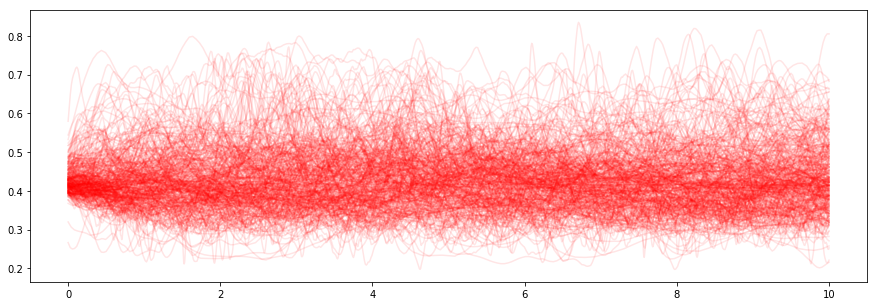

In [36]:
plt.figure(figsize=(15, 5))
adict = {0: 0.1, 1: 0.2}
cdict = {0: 'red', 1:'blue'}
for trace in user_traces:
    x = trace[0]
    y = trace[1]
    label = trace[2]
    if label == 1:
        continue
    plt.plot(x, y, cdict[label], alpha=adict[label])
plt.show()
x

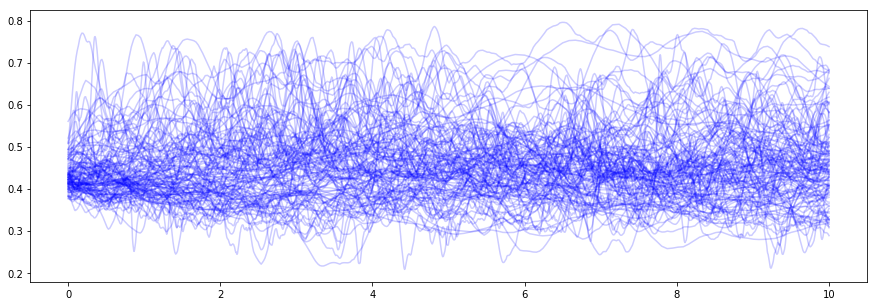

In [37]:
plt.figure(figsize=(15, 5))
adict = {0: 0.1, 1: 0.2}
cdict = {0: 'red', 1:'blue'}
for trace in user_traces:
    x = trace[0]
    y = trace[1]
    label = trace[2]
    if label == 0:
        continue
    plt.plot(x, y, cdict[label], alpha=adict[label])
plt.show()

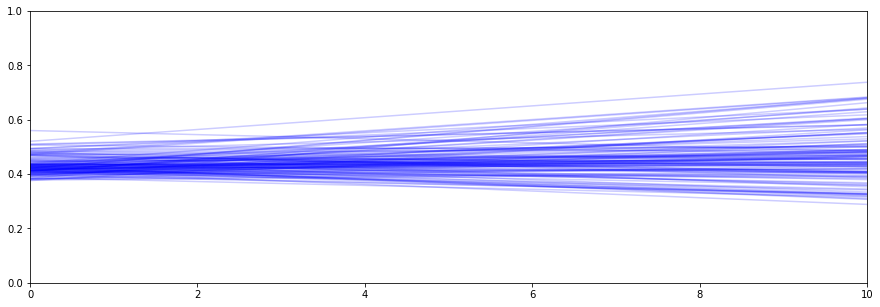

In [38]:
plt.figure(figsize=(15, 5))
adict = {0: 0.1, 1: 0.2}
cdict = {0: 'red', 1:'blue'}
for trace in user_traces:
    x = [trace[0][0], trace[0][-1]]
    y = [trace[1][0], trace[1][-1]]
    label = trace[2]
    if label == 0:
        continue
    plt.plot(x, y, cdict[label], alpha=adict[label])
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

/Users/chunkit/anaconda3/envs/dlenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'ax' is not defined

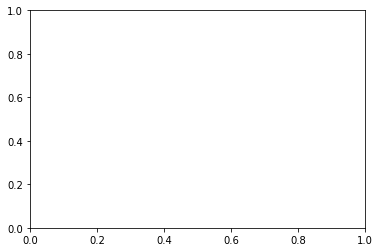

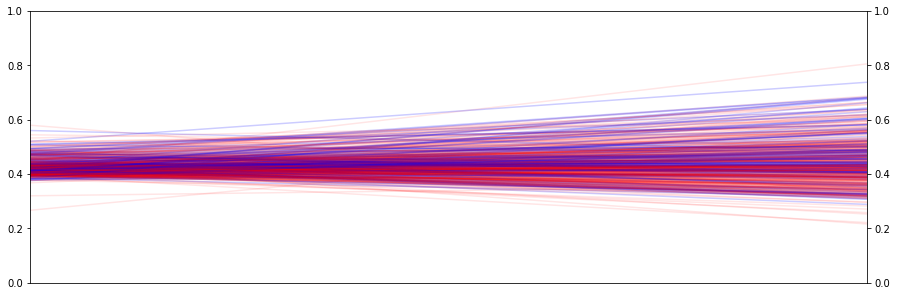

In [39]:

fig, ax1 = plt.subplots()
plt.figure(figsize=(15, 5))
adict = {0: 0.1, 1: 0.2}
cdict = {0: 'red', 1:'blue'}
label_dict = {0: 'non-STEM', 1: 'STEM'}
for trace in user_traces:
    x = [trace[0][0], trace[0][-1]]
    y = [trace[1][0], trace[1][-1]]
    label = trace[2]
#     if label == 1:
#         continue
    plt.plot(x, y, cdict[label], alpha=adict[label])
plt.xlim(0, 10)
plt.ylim(0, 1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='on',         # ticks along the top edge are off
    labelright='on') # labels along the bottom edge are off

ax.yaxis.grid()

ax.set_ylabel('pre-score')
ax2.set_ylabel('post-score')

plt.plot([], [], cdict[0], alpha=0.5, label='non-STEM')
plt.plot([], [], cdict[1], alpha=0.5, label='STEM')
ax.legend(loc='upper right')

knowledge_gain_stem = np.array([(trace[1][-1] - trace[1][0])/(1-trace[1][0]) for trace in user_traces if trace[2]==1])
knowledge_gain_nonstem = np.array([(trace[1][-1] - trace[1][0])/(1-trace[1][0]) for trace in user_traces if trace[2]==0])
plt.text(0.5, 0.85, "Avg. NLG for STEM students = {:.3f} $\pm$ {:.3f}".format(knowledge_gain_stem.mean(), knowledge_gain_stem.std()), fontsize=12)
plt.text(0.5, 0.90, "Avg. NLG for non-STEM students = {:.3f} $\pm$ {:.3f}".format(knowledge_gain_nonstem.mean(), knowledge_gain_nonstem.std()), fontsize=12)

plt.savefig('knowledge_state_nlg.pdf', bbox_inches='tight')

In [ ]:
knowledge_gain_stem = np.array([trace[1][-1] - trace[1][0] for trace in user_traces if trace[2]==1])
knowledge_gain_nonstem = np.array([trace[1][-1] - trace[1][0] for trace in user_traces if trace[2]==0])
print("NLG for STEM students = {:.3f} $\pm$ {:.3f}".format(knowledge_gain_stem.mean(), knowledge_gain_stem.std()))
print("NLG for STEM students = {:.3f} $\pm$ {:.3f}".format(knowledge_gain_nonstem.mean(), knowledge_gain_nonstem.std()))

In [ ]:
sum([trace[0][0] < trace[0][-1] for trace in user_traces if trace[2]==1])

In [ ]:
sum([trace[0][0] < trace[0][-1] for trace in user_traces if trace[2]==0])

In [ ]:
post = np.array([trace[1][-1] for trace in user_traces if trace[2]==1])
pre = np.array([trace[1][0] for trace in user_traces if trace[2]==1])
nlg = (post.mean() - pre.mean()) / (1 - pre.mean())
print(nlg)

In [ ]:
post = np.array([trace[1][-1] for trace in user_traces if trace[2]==0])
pre = np.array([trace[1][0] for trace in user_traces if trace[2]==0])
nlg = (post.mean() - pre.mean()) / (1 - pre.mean())
print(nlg)